# Проект: Исследование стартапов

Имя: Ососов Ян

Дата: 25.06.2025

**Введение.**

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

**Цель.**

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи.**

1. Познакомится с данными и провести первичную предобработку
2. Провести обработку данных и первичное исследлвание основываясь на полученных данных
3. Провести исследовательский анализ объединённых таблиц
4. Дать заключительный вывод на основании проведенног исследования и рекомендации



## 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* 1
* 2
* 3
* 4
* 5

Опциональные датасеты:
* 6
* 7


### 1.1. Вывод общей информации, исправление названия столбцов


Начнём с загрузки необходимых библиотек и датасетов

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные
ac_df = pd.read_csv('PATH' + 1)
cr_df = pd.read_csv('PATH' + 2)
p_df = pd.read_csv('PATH' + 3)
e_df = pd.read_csv('PATH' + 4)
d_df = pd.read_csv('PATH' + 5)
# И опциональные данные тоже на всякий случай
f_df = pd.read_csv('PATH' + 6)
i_df = pd.read_csv('PATH' + 7)

#### Датасет `1`

Таблица `1` Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

In [3]:
# Выводим первые строки датафрейма на экран
ac_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выводим информацию о датафрейме
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [5]:
# Выводим информацию о размере датафрейма
ac_df.shape

(9407, 6)

In [6]:
# Проверяем явные дубликаты
ac_df.duplicated().sum()

0

In [7]:
# Процент пропусков
ac_df.isna().sum() / ac_df.shape[0]

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

Датасет `acquisition.csv`, соотвтетствует в полной мере описанию, содержит 9407 сторк и 6 столбцов, названия всех столбцов приведены к snake_case, пропуски имеются только в двух столбцах acquired_at 0.3%(что-то можно с этим сделать если будет нужно) и term_code 80%(оч много, но видимо особо сильно и не нужны будут эти данные), необходдимо провести оптимизацию типов у столбцов: id, acquiring_company_id, acquired_company_id, а такжее после устранения пропусков в стоблце acquired_at, быть может привести к типу данных даты и времени, дуцбликатов янвных нет

In [8]:
# Оптимизируем целочисленный тип данных в датафрейме
ac_df['id'] = pd.to_numeric(ac_df['id'], downcast='integer')
ac_df['acquiring_company_id'] = pd.to_numeric(ac_df['acquiring_company_id'], downcast='integer')
ac_df['acquired_company_id'] = pd.to_numeric(ac_df['acquired_company_id'], downcast='integer')
ac_df['acquired_at'] = pd.to_datetime(ac_df['acquired_at'])
ac_df.dtypes

id                               int16
acquiring_company_id             int32
acquired_company_id              int32
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [9]:
ac_df[ac_df['acquired_at'].isna()]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
70,92,1247,596,cash,82000000,NaT
254,326,191,5718,NaN,0,NaT
290,372,7135,7134,NaN,0,NaT
351,446,4982,5369,NaN,0,NaT
365,467,6812,8634,NaN,0,NaT
377,480,8990,2355,NaN,0,NaT
457,581,1916,11572,NaN,0,NaT
632,778,7037,14790,NaN,0,NaT
647,797,13310,15411,NaN,0,NaT
669,822,15862,7640,NaN,425000000,NaT


In [10]:
ac_df[ac_df['price_amount'] == 0]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
13,20,377,100,cash,0,2005-05-29
15,23,307,306,cash,0,2007-08-07
21,30,541,542,cash,0,2006-01-01
...,...,...,...,...,...,...
9394,10516,1600,71968,NaN,0,2011-11-10
9395,10517,285921,71996,NaN,0,2013-08-31
9397,10519,10120,285956,NaN,0,2013-12-11
9401,10524,285984,285991,NaN,0,2013-12-11


In [11]:
ac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB


In [12]:
ac_df[ac_df['acquired_at'].isna()].head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
70,92,1247,596,cash,82000000,NaT
254,326,191,5718,NaN,0,NaT
290,372,7135,7134,NaN,0,NaT
351,446,4982,5369,NaN,0,NaT
365,467,6812,8634,NaN,0,NaT


Оптимизацию провели,честно дата не прям сильно важная информация пока оставим пропуски, но в целом нам ничего не мешает в любой момент удалить их около 0,3 процентов, привели формат acquired_at к дате без заполнения пропусков, там где пропуски теперь NaT

#### Датасет `2`

Таблица `2` Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

In [13]:
# Выводим первые строки датафрейма на экран
e_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [14]:
# Выводим информацию о датафрейме
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [15]:
# Выводим информацию о размере датафрейма
e_df.shape

(109610, 4)

In [16]:
# Проверяем явные дубликаты
e_df.duplicated().sum()

0

In [17]:
# Процент пропусков
e_df.isna().sum() / e_df.shape[0] 

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

Датасет `2`, соотвтетствует в полной мере описанию, содержит 109610 сторк и 4 столбца, названия всех столбцов приведены к snake_case, пропуски имеются только в двух столбцах instituition 0.05%(что-то можно с этим сделать если будет нужно) и graduated_at 47%(около половины, но видимо особо сильно и не нужны будут эти данные), необходимо провести оптимизацию типов у столбцов: id, person_id, а такжее после устранения пропусков в стоблце graduated_at(если устранение буть целесообразно проводить), быть может привести к типу данных даты и времени(вообще не точно),явных дубликатов нет

In [18]:
# Оптимизируем целочисленный тип данных в датафрейме
e_df['id'] = pd.to_numeric(e_df['id'], downcast='integer')
e_df['person_id'] = pd.to_numeric(e_df['person_id'], downcast='integer')
e_df['graduated_at'] = pd.to_datetime(e_df['graduated_at'])
e_df.dtypes

id                       int32
person_id                int32
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [19]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 2.5+ MB


In [20]:
e_df[e_df['instituition'].isna()]

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
102,103,1697,NaN,2007-01-01
160,161,7304,NaN,NaT
162,163,7306,NaN,NaT
271,272,7724,NaN,NaT
330,331,7914,NaN,NaT
531,532,9359,NaN,1998-01-01
603,604,9742,NaN,NaT
795,795,2524,NaN,2005-01-01
4424,4423,42511,NaN,NaT


Оптитмизацию провели, посмотрели пропуски для instituition, которые около 0.05%, ну закономерностей вот так не видно, пока оставим как есть всегда можно просто удалить, не смотря на большое кол-во пропусков graduated_at столбец привели коформату временени 

#### Датасет `3`

Таблица `3` Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

In [21]:
# Выводим первые строки датафрейма на экран
p_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [22]:
# Выводим информацию о датафрейме
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [23]:
# Выводим информацию о размере датафрейма
p_df.shape

(226709, 5)

In [24]:
# Проверяем явные дубликаты
p_df.duplicated().sum()

0

In [25]:
# Процент пропусков
p_df.isna().sum() / p_df.shape[0] 

id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64

Датасет `3`, соотвтетствует в полной мере описанию, содержит 226709 сторк и 5 столбцов, названия всех столбцов приведены к snake_case, пропуски имеются в четырех столбцах first_name и last_name - 0.0022% и 0.0004%(с этитми пропусакми мы точно сможем поработать), company_id 85% и network_username 83%(оч много, но видимо особо сильно и не нужны будут эти данные, пока непонятно что делать с пропусками), необходимо провести оптимизацию типов у столбцов: id, company_id(после устранения пропусков если такое будет делаться), таблица как будто немного бесполезна на превый взгляд, яных дубликатов нет

In [26]:
p_df['id'] = pd.to_numeric(p_df['id'], downcast='integer')

p_df.dtypes

id                    int32
first_name           object
last_name            object
company_id          float64
network_username     object
dtype: object

In [27]:
p_df[p_df['first_name'].isna()]

,id,first_name,last_name,company_id,network_username
47148,158368,NaN,None,NaN,NaN
207997,78517,NaN,NaN,29.0,NaN
218531,89912,NaN,remove,NaN,NaN
218532,89913,NaN,remove2,NaN,NaN
218533,89914,NaN,remove3,NaN,NaN


In [28]:
p_df[p_df['last_name'].isna()]

,id,first_name,last_name,company_id,network_username
207997,78517,NaN,NaN,29.0,NaN


Ну нам как бы и не нужны вообще эти строки они бесполезные, смело можем удалить, но пока пусть будут держим в голове

#### Датасет `4`

Таблица `4` Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

In [29]:
# Выводим первые строки датафрейма на экран
d_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [30]:
# Выводим информацию о датафрейме
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [31]:
# Выводим информацию о размере датафрейма
d_df.shape

(109610, 4)

In [32]:
# Проверяем явные дубликаты
d_df.duplicated().sum()

0

In [33]:
# Процент пропусков
d_df.isna().sum() / d_df.shape[0] 

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

Датасет `degrees.csv`, соотвтетствует в полной мере описанию, содержит 109610 сторк и 4 столба, названия всех столбцов приведены к snake_case, пропуски имеются в двух столбцах degree_type 10%(не оч хорошо), subject 26%(тоже не особо приятно), можно провести оптимизацию типов у столбца id, object_id почему то object впереди у строк стоит p: возможно это означент связь с таблицей people, удалим этот символ.

In [34]:
d_df['id'] = pd.to_numeric(d_df['id'], downcast='integer')

d_df.dtypes

id              int32
object_id      object
degree_type    object
subject        object
dtype: object

In [35]:
d_df['object_id'] = d_df['object_id'].str.replace('p:', '')

In [36]:
d_df['object_id'] = pd.to_numeric(d_df['object_id'], downcast='integer')
d_df.tail(20)

,id,object_id,degree_type,subject
109590,109591,268517,J.D.,NaN
109591,109592,268519,Bachelor of Science,Engineering
109592,109593,268519,Master of Science,Engineering
109593,109594,268519,Juris Doctor,NaN
109594,109595,268519,MBA,"Finance, General"
109595,109596,268520,B.S.,physics
109596,109597,268520,M.S.,Physics
109597,109598,268521,BS,Mechanical Engineering
109598,109599,268521,MBA,NaN
109599,109600,158143,MBA,NaN


In [37]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  int32 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(2), object(2)
memory usage: 2.5+ MB


Оптимизацуию провели, привели object_id к нужному типу

#### Датасет `5`

Таблица `5` Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним..

In [38]:
# Выводим первые строки датафрейма на экран
cr_df.head(15)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Выводим информацию о датафрейме
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [40]:
# Выводим информацию о размере датафрейма
cr_df.shape


(217774, 22)

In [41]:
# Проверяем явные дубликаты
cr_df.duplicated().sum()

0

In [42]:
# Процент пропусков
cr_df.isna().sum() / cr_df.shape[0] 

company  ID              0.001387
name                     0.001387
category  code           0.339288
status                   0.001387
founded  at              0.495091
closed  at               0.984162
domain                   0.324258
network  username        0.561316
country  code            0.501286
investment  rounds       0.001387
funding  rounds          0.001387
funding  total           0.001387
milestones               0.001387
funding  round  id       0.756959
company  id              0.756959
funded  at               0.758098
funding  round  type     0.756959
raised  amount           0.756959
pre  money  valuation    0.756959
participants             0.756959
is  first  round         0.756959
is  last  round          0.756959
dtype: float64

Датасет `company_and_rounds.csv`, соотвтетствует в полной мере описанию, содержит 217774 сторк и 22 столбцов, названия всех столбцов не приведены к snake_case(нужно будет привести), пропуски имеются во всех столбцах, поскольку это самый важный датасет для выполенения этого задания мы еще вернемся к тому вопросу что будем удалаять, что заполнять, а что игнорировать, есть ощущение что названия столбцов немного некорреткты `company  ID` и `company  id` или дублируют друг-друганужно понять что в действительности есть что, яных дубликатов нет

В целом в пунктах выше мы провели легкую предобрабоку и знакомство со всеми датасетами, более глубоко поработаем с датасетом company_and_rounds.csv

Как уже было выявлено необходимо привести все названия к стилю snake_case однако это выызовет повтор столбцов их нужно переименовать и разобраться что к чему относится

In [43]:
print(cr_df.head(5))

   company  ID      name category  code     status founded  at closed  at  \
0          1.0  Wetpaint            web  operating  2005-10-17        NaN   
1          1.0  Wetpaint            web  operating  2005-10-17        NaN   
2          1.0  Wetpaint            web  operating  2005-10-17        NaN   
3         10.0   Flektor    games_video   acquired         NaN        NaN   
4        100.0     There    games_video   acquired         NaN        NaN   

             domain network  username country  code  investment  rounds  ...  \
0  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
1  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
2  wetpaint-inc.com   BachelrWetpaint           USA                 0.0  ...   
3       flektor.com               NaN           USA                 0.0  ...   
4         there.com               NaN           USA                 0.0  ...   

   milestones  funding  round  id  company  id  funded  

In [44]:
print(cr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [45]:
print(f_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB
None


In [46]:
f_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [47]:
print(i_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB
None


In [48]:
print(i_df.tail())

          id  funding_round_id  company_id  fund_id
61398  61399             57926       15847      173
61399  61400             57926       15847     1290
61400  61401             57926       15847       73
61401  61402             57942       70841    15098
61402  61403             57948      211890     2101


Пока не до конца понятно какой-id что означает боюсь на данном этапе мы не делаем никаких исправлений только лишь смотрим, есть вот некоторое предположение что ключ к пониманию таблицы company_and_rounds.csv лежит в связи тех самых таблиц дополнительных. Точно следуя заданию в этом пункте я лишь проверил названия и да названия таблицы company_and_rounds.csv требуют ккоррекции не только в плане стиля но и вплане значений, 

чтобы не закапывать себя дальше: данные всех датасетов загрузил, названиия столбцов проверил все круто кроме company_and_rounds.csv, видимо будем работать с этим дальшге пока только наблюдаем, что-то немного предобработал(провел оптимизацию изменил тип данных где это возможно, кроме последней таблицы сделаю это в след пункте), индивидульно для каждого из датасетов вывел нужную информацию и сделал определенные выводы по принятию решений об предобработки

### 1.2. Смена типов и анализ пропусков

Обработал все столбцы с временем выше, кроме датасета company_and_rounds, займемся этим сейчас

cтолбцы с датой и временем в этом датасете founded  at, closed at, funded at сделаем из них датувремя


In [51]:
cr_df['founded  at'] = pd.to_datetime(cr_df['founded  at'])
cr_df['closed  at'] = pd.to_datetime(cr_df['closed  at'])
cr_df['funded  at'] = pd.to_datetime(cr_df['funded  at'])
cr_df.dtypes

company  ID                     float64
name                             object
category  code                   object
status                           object
founded  at              datetime64[ns]
closed  at               datetime64[ns]
domain                           object
network  username                object
country  code                    object
investment  rounds              float64
funding  rounds                 float64
funding  total                  float64
milestones                      float64
funding  round  id              float64
company  id                     float64
funded  at               datetime64[ns]
funding  round  type             object
raised  amount                  float64
pre  money  valuation           float64
participants                    float64
is  first  round                float64
is  last  round                 float64
dtype: object

Я думаю данных относительно достаточно чтобы провести анализ и выполнить все задачи анализа, однако они очень грязные, еще много работы предстоит сделать с ними непонятно какую лепту принесут выбросы, ведь есть очень много пропусков. как я в целом понял одна из наших аналитических задач анализ влияния пропусков так что мыы и будем делать это дальше

Как заключение ШАГА 1 Знакомство с даными.

Мы познакомились с данными увидели много всего 4 из 5 таблиц в цеелом аккуратные, везде есть пропуски. Произвели оптимизацию типов, также привели столбцы к нужным типам где это возможно(дата и время по большей частии, но еще object_id привели к числовому к примеру), таблца company_and_rounds требует углубленной предобработки, непонятные названия, много информации, при этом много пропусков, стиль разномастный, есть дубликаты столбцов, этот даатасет не дает полной картины и быстрого ппонимания что происходит и не даеет поле для анализа закономерностей. Данныых достаточно для изучения и анализа но их представление не позволяет это делать 

## 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [52]:
cr_df['year'] = cr_df['funded  at'].dt.year

pivot_t = cr_df.groupby('year')['raised  amount'].agg(['median','count']).reset_index()
pivot_t = pivot_t[pivot_t['count'] > 50]
print(pivot_t)
pivot_t.info()

      year     median  count
15  1999.0  2000000.0     76
16  2000.0  4200000.0    125
17  2001.0  3000000.0     96
18  2002.0  4200000.0    116
19  2003.0  3000000.0    159
20  2004.0  5000000.0    291
21  2005.0  5500000.0   1633
22  2006.0  5000000.0   2436
23  2007.0  3973320.0   3279
24  2008.0  3110000.0   3774
25  2009.0  2000000.0   4151
26  2010.0  1602500.0   6221
27  2011.0  1200000.0   9204
28  2012.0  1000000.0   9970
29  2013.0  1200000.0  11072
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 15 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15 non-null     float64
 1   median  15 non-null     float64
 2   count   15 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 480.0 bytes


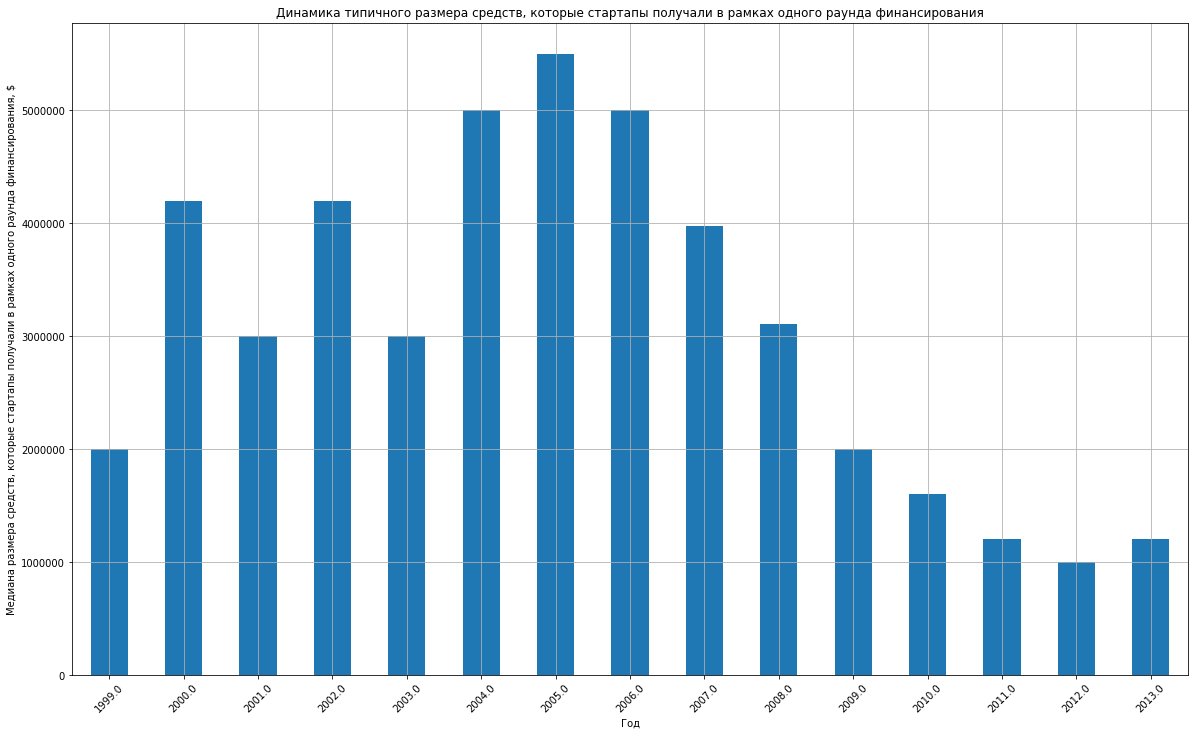

In [53]:
ax = pivot_t.plot(kind='bar', x='year', legend=False,  y='median', figsize=(20, 12), grid=True, rot='45')
ax.set_title('Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования')
ax.set_xlabel('Год')
ax.set_ylabel('Медиана размера средств, которые стартапы получали в рамках одного раунда финансирования, $')
plt.ticklabel_format(axis='y',style='plain')
plt.show()

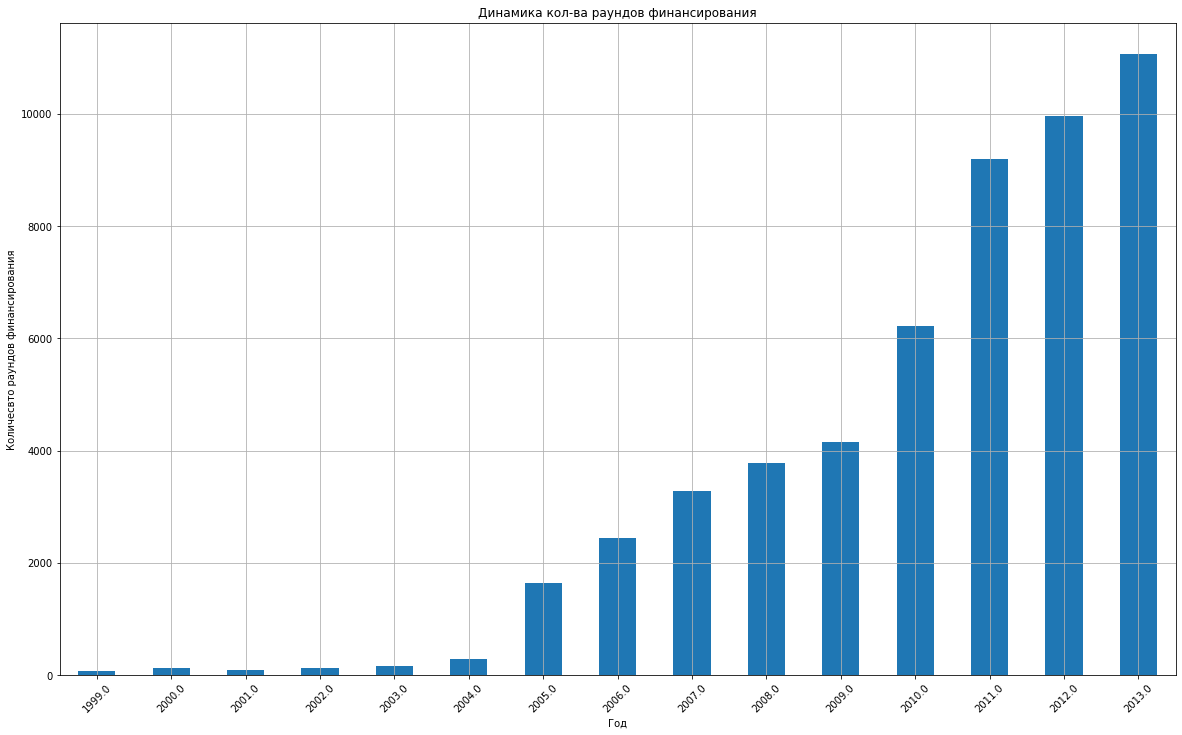

In [54]:
ax = pivot_t.plot(kind='bar', x='year', legend=False,  y='count', figsize=(20, 12), grid=True, rot='45')
ax.set_title('Динамика кол-ва раундов финансирования')
ax.set_xlabel('Год')
ax.set_ylabel('Количесвто раундов финансирования')
plt.show()


- типичный размер собранных в рамках одного раунда средств был максимален в 2005 году
- в 2013 году наблюдался рост как и по количеству раундов так и по типичному размеру средств собранному в рамках одного раунда, количество раундов  в целом с каждым годом все растет, однако типичныый размер средств падал начиная с 2005 года, до 2012


### 2.2. Люди и их образование


In [55]:
p_df.sort_values('id').tail(15)

,id,first_name,last_name,company_id,network_username
156384,268572,Tai-Sen,Soong,NaN,NaN
156385,268575,Konstantin,Arkhipov,NaN,NaN
156386,268576,Tina,Hoang-To,NaN,NaN
156387,268577,David,Rodnitzky,NaN,NaN
156388,268578,Donna,L. Tempel,NaN,NaN
156389,268579,John,Bissell,NaN,NaN
156391,268580,Ryan,Smith,NaN,NaN
156392,268584,Cecil,Bond Kyte,NaN,NaN
156393,268585,Alfredo,Feo,NaN,NaN
156394,268586,Ariel,Rodriguez,NaN,NaN


In [56]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int32  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 7.8+ MB


In [57]:
e_df.sort_values('person_id').tail(15)

,id,person_id,instituition,graduated_at
109593,109594,268519,"Loyola University, New Orleans, Louisiana",1985-01-01
109595,109596,268520,Waseda University,NaT
109596,109597,268520,Waseda University,NaT
109597,109598,268521,"University of California, Santa Barbara",2002-01-01
109598,109599,268521,"University of California, Irvine - The Paul Me...",2006-01-01
109603,109604,268524,"Wharton School of Business , University of Pen...",NaT
109601,109602,268524,Wharton School,NaT
109602,109603,268524,University of California at Berkeley,NaT
109607,109608,268527,Clarkson University,NaT
109606,109607,268527,South China University of Technology,NaT


In [58]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 2.5+ MB


Так в результате анализа мы будем присоединять данные из таблицы education к таблице people

In [59]:
p_e_df = pd.merge(p_df, e_df, how='left', left_on='id', right_on='person_id')
p_e_df.head(15)
p_e_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int32         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 19.4+ MB


Мы получили больше столбцов тк многие сотрудники имеют по два образования, это немного искажает наше исследование, удалим дубликаты строк

In [60]:
p_e_df[['id_x', 'first_name','last_name', 'company_id' ]].duplicated().sum()

40985

Как раз на столько строк увеличилась наша исходная таюлица с информацией о сотрудниках

In [61]:
p_e_df.drop_duplicates(subset=['id_x', 'first_name','last_name', 'company_id' ], inplace=True)
p_e_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              226709 non-null  int32         
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_y              68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 16.4+ MB


Создадим новый столбец is_info, в котором содеражится флаг 1 если есть информация об образовании, 0 если ее нет, так кстати мы отбрасываеем те самые пропуски таблицы education столбца instituition и считаем остутсвие информации втом числе отсутсвие информации об институте

In [62]:
p_e_df['is_info'] = 1 - p_e_df['instituition'].isna() 
p_e_df.head(15)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,is_info
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,1
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,0
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,0
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,0
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,0
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,0
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01,1
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,0
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,0
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,0


теперь произведем группировку данных по company_id, выведем сумму, для столбцов is_info - кол-во сотрудников в компании о которых есть информация

In [63]:
table_2 = p_e_df.groupby('company_id')[['id_x', 'is_info']].agg({'id_x':'count', 'is_info':'sum' }).reset_index()
table_2['part'] =( table_2['id_x'] - table_2['is_info'] )/ table_2['id_x']

In [64]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22922 entries, 0 to 22921
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company_id  22922 non-null  float64
 1   id_x        22922 non-null  int64  
 2   is_info     22922 non-null  int64  
 3   part        22922 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 716.4 KB


In [65]:
table_2.head()

,company_id,id_x,is_info,part
0,1.0,2,1,0.500000
1,2.0,1,1,0.000000
2,3.0,3,2,0.333333
3,4.0,13,12,0.076923
4,5.0,61,45,0.262295


In [66]:
table_2.groupby('id_x')['id_x'].count()

id_x
1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
10        25
11        30
12        16
13        17
14         8
15         3
16         4
17         5
18         3
19         3
20         3
21         2
22         2
23         3
25         2
26         1
29         2
31         1
32         1
35         1
36         1
39         1
47         1
48         1
51         1
56         2
61         1
63         1
72         1
138        1
150        1
244        1
Name: id_x, dtype: int64

In [67]:
bins   = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
table_2['category'] = pd.cut(table_2['id_x'], bins=bins, labels=labels)
table_2.head()

,company_id,id_x,is_info,part,category
0,1.0,2,1,0.500000,2
1,2.0,1,1,0.000000,1
2,3.0,3,2,0.333333,3
3,4.0,13,12,0.076923,11-25
4,5.0,61,45,0.262295,26+


Видим как распределяется число работников в компании, на гистограмме будет сложно понять, выберем следующие категории: один сотрудник, 2-5 сотрудников, 6-10 сотрудников, от 11 до 20, 20 и выше,создадим категории

In [70]:
table_2.head()

,company_id,id_x,is_info,part,category
0,1.0,2,1,0.500000,2
1,2.0,1,1,0.000000,1
2,3.0,3,2,0.333333,3
3,4.0,13,12,0.076923,11-25
4,5.0,61,45,0.262295,26+


In [71]:
table_2.groupby('category')['part'].mean().sort_values()

category
26+      0.266928
11-25    0.459660
1        0.463156
2        0.466962
3        0.487875
4-5      0.497962
6-10     0.531828
Name: part, dtype: float64

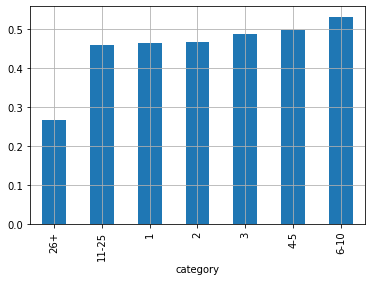

In [72]:
table_2.groupby('category')['part'].mean().sort_values().plot(kind='bar',grid=True)
ax.set_title('средняя доля сотрудников без информации об образовании в каждой из групп')
ax.set_xlabel('категория')
ax.set_ylabel('среднюю долю сотрудников без информации об образовании')
plt.show()

Видно что средняя доля сотрудников без информации об образовании в компаниях минимальна в многочисленных компаниях, масимальна в компаниях где 6-10 сотрудников, но до конца не понятно что есть среедняя доля поэтому решил посчиать еше и так
Есть тенденция что в компаниях с большим числом сотрудников, больше 26 или 11-25, информации больше о сотруддниках, но затем следующая категория компаний где сотрудник 1 и с увеличением числа сотрудников кол-во информации уменьшается.
На счет первого, длествительно большщие компании видут больше отчестности - соотв больше информации. 1, 2 это очень маленькие компании сложнее забыть ннаписать информацию о себе, а дальше идут среднеее компанни, где видимо информация о части персонала (низшего уровня) не собирается или нет таких механизмов, недостаточно развитые для этого.

           id_x  is_info      part
category                          
1         18117     9726  0.463156
2          5418     2888  0.466962
3          2763     1415  0.487875
4-5        2985     1493  0.499832
6-10       2664     1242  0.533784
11-25      1425      774  0.456842
26+        1243      904  0.272727


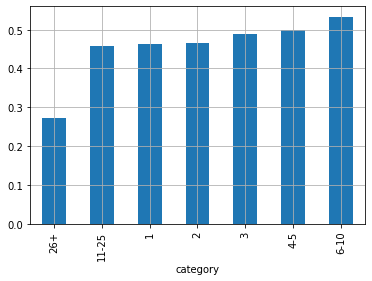

In [73]:
table_2_sum = table_2.groupby('category')[['id_x', 'is_info']].sum()

table_2_sum['part'] = (table_2_sum['id_x'] - table_2_sum['is_info'])/ table_2_sum['id_x']
print(table_2_sum)
table_2_sum['part'].sort_values().plot(kind='bar',grid=True)
ax.set_title('средняя доля сотрудников без информации об образовании в каждой из групп')
ax.set_xlabel('категория')
ax.set_ylabel('среднюю долю сотрудников без информации об образовании')
plt.show()

ну в целом все то же самое 

In [74]:
p_e_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 267693
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              226709 non-null  int32         
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_y              68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
 9   is_info           226709 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 18.2+ MB


In [75]:
e_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int32         
 1   person_id     109610 non-null  int32         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 2.5+ MB


In [76]:
p_e_df.sort_values('id_x').head(15)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,is_info
100011,2,Ben,Elowitz,4993.0,elowitz,699.0,2.0,"University of California, Berkeley",1994-01-01,1
191139,3,Kevin,Flaherty,1.0,NaN,706.0,3.0,Washington University in St Louis,NaT,1
202670,4,Raju,Vegesna,3.0,NaN,NaN,NaN,NaN,NaT,0
214176,5,Ian,Wenig,3.0,NaN,47870.0,5.0,The Aji Network,2005-01-01,1
225646,6,Kevin,Rose,16441.0,kevinrose,15624.0,6.0,"University of Nevada, Las Vegas",NaT,1
236914,7,Jay,Adelson,4.0,jayadelson,22649.0,7.0,Boston University,1992-01-01,1
248157,8,Owen,Byrne,4.0,owenbyrne,1027.0,8.0,Saint Mary's (Canada),1986-01-01,1
258507,9,Ron,Gorodetzky,4.0,NaN,8161.0,9.0,"University of California, San Diego (UCSD)",2003-01-01,1
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,1
8886,11,Dustin,Moskovitz,5.0,NaN,13476.0,11.0,Harvard University,NaT,1


In [77]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  int32 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(2), object(2)
memory usage: 2.5+ MB


In [78]:
d_df.sort_values('object_id').head(15)

,id,object_id,degree_type,subject
698,699,2,BS,Electrical Engineering/Computer Science
699,700,2,BS,Applied Mathematics
705,706,3,BBA,NaN
706,707,3,MBA,NaN
47870,47871,5,BS,"Biology, Psychology"
47869,47870,5,Degree,Advanced Business Professional Course
69508,69509,6,NaN,NaN
15623,15624,6,NaN,NaN
22648,22649,7,NaN,"Film and Broadcasting, Computer Science Concen..."
1026,1027,8,BS,Computer Science


Я бы сказал что degrees избыточна там столько же строк 109610 как и в education, плюс ко всему больше пропусков, быть может какие-то перекрывают строки с пропусками институтов,а  врамках информации мы все равно удалем повторы после объединения, сотавляем только одно из образваоний сотрудника, нам скорее важно его начличие в этом пункте, даже наличие сведений с этой точки зрения этот датасет бесполезеен

### 2.3. Столбцы с именем network_username для объединения данных.


network_username встерчается в двух таблицах company_and_rounds и people

In [79]:
cr_df.sort_values('company  ID').head(15)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.000000e+00,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.000000e+00,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.000000e+00,4.0,1.0,0.0,2008.0
63280,2.0,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153920,3.0,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165415,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,...,85.0,4.0,2005-10-01,series-a,2800000.0,0.000000e+00,8.0,0.0,1.0,2005.0
165414,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,...,1.0,4.0,2006-12-01,series-b,8500000.0,0.000000e+00,2.0,0.0,0.0,2006.0
165416,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,...,3503.0,4.0,2008-09-24,series-c+,28700000.0,0.000000e+00,4.0,0.0,0.0,2008.0
165417,4.0,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,...,24136.0,4.0,2011-07-12,series-c+,5000000.0,0.000000e+00,0.0,1.0,0.0,2011.0
217293,5.0,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,...,4587.0,5.0,2008-03-27,series-c+,60000000.0,0.000000e+00,2.0,0.0,0.0,2008.0


In [80]:
p_df.sort_values('company_id').head(15)

,id,first_name,last_name,company_id,network_username
159418,3,Kevin,Flaherty,1.0,NaN
3834,104800,Alex,Weinstein,1.0,alexweinstein
224495,9729,Bharath,Balasubramanian,2.0,spinfree
179580,5,Ian,Wenig,3.0,NaN
194027,6456,Sridhar,Vembu,3.0,NaN
169453,4,Raju,Vegesna,3.0,NaN
199499,7,Jay,Adelson,4.0,jayadelson
179753,50168,Michele,Husak,4.0,mhdeadhead
218614,9,Ron,Gorodetzky,4.0,NaN
69609,18212,Kiersten,Hollars,4.0,NaN


судя по предворительной оценке этот столбец означает разное, как вообще можно заметить таблица company_and_rounds как бы создана путем соединения таблиц одной из которых явлется fund в ней network_username есть ник фонда в сети а в таблице это ник работника, попробуем найти соотетсвия

In [81]:
n_1 = cr_df['network  username'].unique()
cr_df['network  username'].nunique()

79571

In [82]:
n_2 = p_df['network_username'].unique()
p_df['network_username'].nunique()

38421

In [83]:
intersection = set(n_1).intersection(n_2)
len(intersection)

2200

In [84]:
len(intersection)/cr_df['network  username'].nunique()

0.027648263814706364

видно что пересечения есть однако это лишь 3% от всех уникальных знчаений network  username таблицы company_and_rounds, это скорее локальные случаи быть может когда член компании один как бы его ник и есть ник компании в сети
информация не дублируеется, однако для каких то оппрделенныых целей анализа можно произыордить обххеединение по этому столбцу например анализ компаний с одним человеком которыее представляет компанию, что-то около такого


### 2.4. Проблемный датасет и причина возникновения пропусков


In [85]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company  ID            217472 non-null  float64       
 1   name                   217472 non-null  object        
 2   category  code         143886 non-null  object        
 3   status                 217472 non-null  object        
 4   founded  at            109956 non-null  datetime64[ns]
 5   closed  at             3449 non-null    datetime64[ns]
 6   domain                 147159 non-null  object        
 7   network  username      95534 non-null   object        
 8   country  code          108607 non-null  object        
 9   investment  rounds     217472 non-null  float64       
 10  funding  rounds        217472 non-null  float64       
 11  funding  total         217472 non-null  float64       
 12  milestones             217472 non-null  floa

In [86]:
print(cr_df.sort_values('company  ID').head(25))

        company  ID       name   category  code     status founded  at  \
0               1.0   Wetpaint              web  operating  2005-10-17   
1               1.0   Wetpaint              web  operating  2005-10-17   
2               1.0   Wetpaint              web  operating  2005-10-17   
63280           2.0  AdventNet       enterprise  operating  1996-01-01   
153920          3.0       Zoho         software  operating  2005-09-15   
165415          4.0       Digg             news   acquired  2004-10-11   
165414          4.0       Digg             news   acquired  2004-10-11   
165416          4.0       Digg             news   acquired  2004-10-11   
165417          4.0       Digg             news   acquired  2004-10-11   
217293          5.0  Socialnet           social        ipo  2004-02-01   
217286          5.0  Socialnet           social        ipo  2004-02-01   
217287          5.0  Socialnet           social        ipo  2004-02-01   
217288          5.0  Socialnet        

хм обратил внимание что перепутали столбцы is  first  round и  is  last  round местами, как уже писал до этого круто привести все к snake_case, для этого проверим столбцы company  ID и company  id

In [87]:
cr_df[(cr_df['company  ID'] == cr_df['company  id']) & (cr_df['company  id'].isna())]['company  id'].count()

0

можно заметить что столбец company  id тот столбец по которму производили соединение второй таблицы он либо тот же что и company  ID либо nan, тк просто из творой таблицы совпадений не нашлось, ну его можно и удалить 

есть следующие рассуждения есть компании их инвестируют фонды, в доп даныых есть таблица с фондами и информацией о раундах, наша таблица как будто сборник двух таблиц в целом про данные компаний, но не факт же что в них инвестировали фонды, и о раундах инвестиций я бы для удобства наврное разделил, если потребуется соеденил бы обратно

In [88]:
c_df = cr_df[['company  ID','name', 'category  code','status','founded  at', 'closed  at','domain','network  username',
             'country  code','investment  rounds','funding  rounds','funding  total','milestones']].copy(deep=True)
c_df.info()
c_df = c_df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company  ID         217472 non-null  float64       
 1   name                217472 non-null  object        
 2   category  code      143886 non-null  object        
 3   status              217472 non-null  object        
 4   founded  at         109956 non-null  datetime64[ns]
 5   closed  at          3449 non-null    datetime64[ns]
 6   domain              147159 non-null  object        
 7   network  username   95534 non-null   object        
 8   country  code       108607 non-null  object        
 9   investment  rounds  217472 non-null  float64       
 10  funding  rounds     217472 non-null  float64       
 11  funding  total      217472 non-null  float64       
 12  milestones          217472 non-null  float64       
dtypes: datetime64[ns](2), float64

In [89]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   company  ID         196553 non-null  float64       
 1   name                196553 non-null  object        
 2   category  code      123186 non-null  object        
 3   status              196553 non-null  object        
 4   founded  at         91227 non-null   datetime64[ns]
 5   closed  at          2620 non-null    datetime64[ns]
 6   domain              126545 non-null  object        
 7   network  username   80591 non-null   object        
 8   country  code       87990 non-null   object        
 9   investment  rounds  196553 non-null  float64       
 10  funding  rounds     196553 non-null  float64       
 11  funding  total      196553 non-null  float64       
 12  milestones          196553 non-null  float64       
dtypes: datetime64[ns](2), float64

In [90]:
c_df.columns = c_df.columns.str.lower()
c_df.columns = c_df.columns.str.replace(' ', '_')
c_df.columns = c_df.columns.str.replace('__', '_')
print(c_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'],
      dtype='object')


Вообще все стало супер и не нужно лишней агрегации как и просилось, а теперь чтобы не потерять данные новая таблица для раундов

In [91]:
r_df = cr_df[['funding  round  id', 'company  id','funded  at','funding  round  type','raised  amount', 'pre  money  valuation',
             'participants', 'is  first  round', 'is  last  round' ]].copy(deep=True)
r_df.info()
r_df = r_df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   funding  round  id     52928 non-null  float64       
 1   company  id            52928 non-null  float64       
 2   funded  at             52680 non-null  datetime64[ns]
 3   funding  round  type   52928 non-null  object        
 4   raised  amount         52928 non-null  float64       
 5   pre  money  valuation  52928 non-null  float64       
 6   participants           52928 non-null  float64       
 7   is  first  round       52928 non-null  float64       
 8   is  last  round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


In [92]:
r_df.columns = r_df.columns.str.lower()
r_df.columns = r_df.columns.str.replace(' ', '_')
r_df.columns = r_df.columns.str.replace('__', '_')
print(r_df.columns)

Index(['funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


In [93]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52929 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.0+ MB


Остальось поменять местами is_first_round и is_last_round


In [94]:
r_df = r_df.rename(columns={'is_first_round':'is_last_round', 'is_last_round':'is_first_round',})
r_df.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_last_round,is_first_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0


Вывод

Провели знакомство с данными
Сделали предобработку в том объеме необходимом для выыполнения задания:
- привели к snake_case
- оптимизировали типы данных а такжее где нужно привели к необходимому
- проверили данные на адекватность и где-то исправили ошибки, например поменяли местами  is_last_round и is_first_round
- провели начальныый анализ и совершили некторое вычисления

в целом после этой части понятна суть и объем данных, была проведена работу по поиску оптимального выражения большой таблицы company_and_rounds


## 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [95]:
df = c_df[(c_df['funding_rounds'] > 0) | (c_df['investment_rounds'] > 0) | (c_df['status'] == 'acquired')].reset_index()
df = df.drop(['index'], axis=1)
df = df.merge(ac_df, how='left',left_on='company_id', right_on='acquired_company_id')
df = df.drop(['id', 'acquired_company_id'], axis=1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  acquiring_compan

In [97]:
df.shape

(40890, 17)

Получился новыц датасет df который содержит порядка 40 тысяч компаний, которые интересуют наших заказчиков,иакже добавили инфформацию о сумме за которую была приобретена компания, там где есть информация об этом, ввидимо какие-то компании приобретались несколько раз


### 3.2. Анализ выбросов



In [98]:
df['funding_total'].describe()

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64

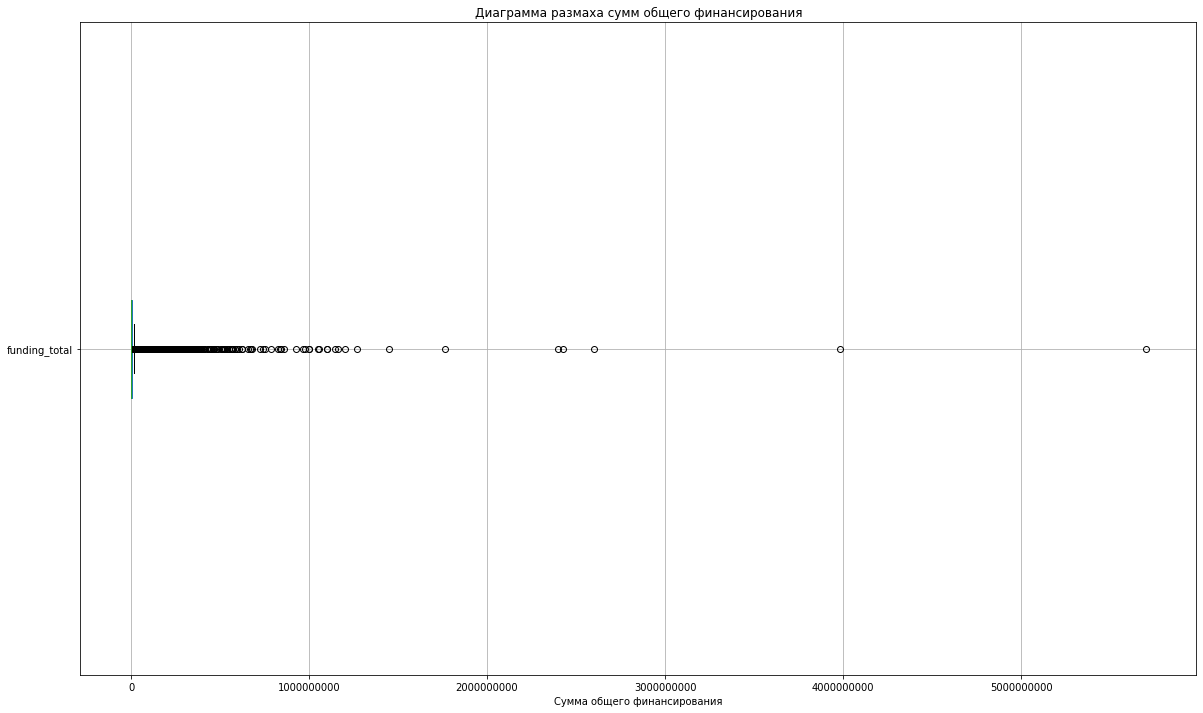

In [99]:
df['funding_total'].plot(kind='box', grid=True,figsize=(20, 12),vert=False)
plt.title('Диаграмма размаха сумм общего финансирования')
plt.xlabel('Сумма общего финансирования')
plt.ticklabel_format(axis='x',style='plain')
plt.show()

Необходимо отбросить выбросы, они сильно искажают оценку типичного значения - медианы

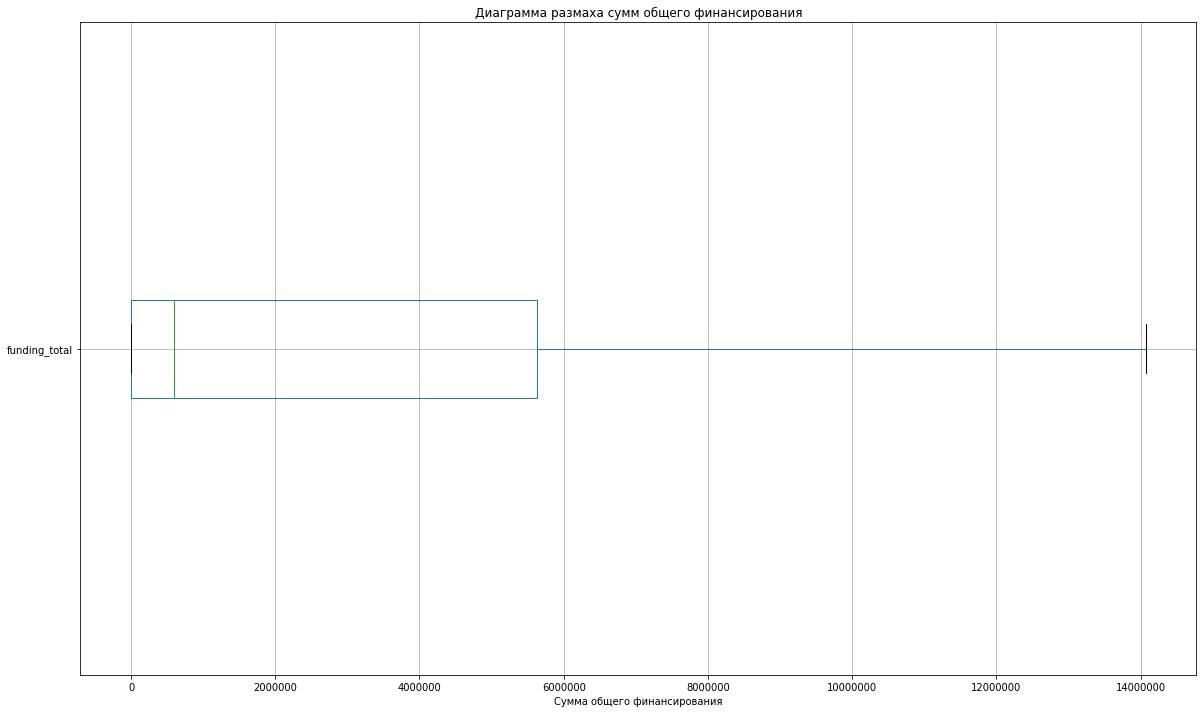

In [100]:
df['funding_total'].plot(kind='box', grid=True,figsize=(20, 12),vert=False,showfliers=False )
plt.title('Диаграмма размаха сумм общего финансирования')
plt.xlabel('Сумма общего финансирования')
plt.ticklabel_format(axis='x',style='plain')
plt.show()

Очень сложно исследовать распределение показателя суммы общего финансирования, тк распрределние силльно смещено ввлево, медиана равна 0.6 млн когда среднее 17 млн на порядок выше, а максимальное значение вообще 5.7 млрд даже если отбросить данные которые попадают в категорию выбросов вв соотв с диаграммой(хочется отметить что это все таки настоящие цифры и не выбросы просто суммы сильно большие их нельзя ну просто выбросить)
Данные сильно разные и не одного порядка, варируются в диапазоне нескольких порядков, внутри которых размазаны относительно равномерно
Ну типичными можно наверное сказать что будут значения от 0 до 14млн, все что выше будет не совсем типичным и больше выбивающимся, это 14 процентов данных, я думаю что было бы логично сделать разные категории в зависимости от общей суммы финансирования и проводить какой-либо анализ внутри выбрранных категорий.



Применимы ли к таким данным обычные способы нахождения типичных значений? - Ответ:нет

In [101]:
df[df['funding_total'] >14000000]['funding_total'].count()/df['funding_total'].count()

0.14431401320616288


### 3.3. Исследование компаний, которые были проданы за ноль или за один доллар



In [102]:
display(df[df['price_amount'] == 0])
display(df[df['price_amount'] == 1])
display(df[df['price_amount'] == 2])
display(df.groupby('price_amount')['price_amount'].count())
df[df['funding_total'] != 0].groupby('price_amount')['price_amount'].count()


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,377.0,cash,0.0,2005-05-29
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,23054.0,NaN,0.0,2010-09-30
17,100265.0,Coastal Supply Company,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,1.0,38215.0,NaN,0.0,2011-09-06
23,1004.0,Tioti,games_video,acquired,NaT,NaT,tioti.com,NaN,USA,0.0,0.0,0.0,3.0,15389.0,NaN,0.0,2008-12-15
24,10049.0,INNCOM,hardware,acquired,1986-01-01,NaT,inncom.com,NaN,USA,0.0,0.0,0.0,0.0,15850.0,NaN,0.0,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40866,118723.0,NetworkBar,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,21138.0,NaN,0.0,2011-04-06
40867,11484.0,Networktise,web,acquired,2008-08-01,NaT,networktise.com,NaN,NaN,0.0,0.0,0.0,0.0,205151.0,NaN,0.0,2013-05-10
40872,153326.0,Yoke,web,acquired,NaT,NaT,apps.socialnet.com::yokeapp,NaN,NaN,0.0,1.0,500000.0,1.0,2352.0,NaN,0.0,2012-09-11
40881,53224.0,UberNetwork,web,acquired,NaT,NaT,ubernetwork.com::,NaN,NaN,0.0,0.0,0.0,1.0,45529.0,NaN,0.0,2011-01-23


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
15465,236268.0,ItIsWhatIt.Is,other,acquired,2013-04-01,NaT,itiswhatit.is,ItIsWhatItDotIs,GBR,0.0,0.0,0.0,0.0,267885.0,cash,1.0,2013-09-30
19837,266297.0,Online Tech Pc,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,266298.0,cash,1.0,2013-08-13
22968,283073.0,Catherine Price Acupuncture,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,283074.0,NaN,1.0,2007-01-01


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at


price_amount
0.000000e+00    6917
1.000000e+00       3
1.100000e+01       1
4.900000e+01       1
6.000000e+01       1
                ... 
2.600000e+10       1
2.810000e+10       1
3.500000e+10       1
3.900000e+10       1
2.600000e+12       1
Name: price_amount, Length: 1036, dtype: int64

price_amount
0.000000e+00    1618
1.090000e+05       1
2.581000e+05       1
2.700000e+05       1
4.500000e+05       1
                ... 
2.870000e+09       1
3.000000e+09       1
3.700000e+09       2
4.900000e+09       1
8.500000e+09       1
Name: price_amount, Length: 360, dtype: int64

Как видно есть компании которые быыли купленв за смешные деньги тут дае речь не только про 0, но 1, 11, 49 долларов как-то тоже мало для компаний, но если убрать компани финансирование которых не производилось funding_total=0, остануться лишь компании, которые купили за 0 и их будет 1618, остальные компании куплены по адеватной цене

In [103]:
df_zero = df[(df['funding_total'] != 0  ) & (df['price_amount'] == 0  )].copy(deep=True)
df_zero.head(15)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
25,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,23283.0,cash_and_stock,0.0,2013-08-13
63,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,11391.0,NaN,0.0,2013-09-18
66,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,1972.0,NaN,0.0,2012-06-18
67,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,757.0,cash_and_stock,0.0,2012-11-05
68,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,1.0,44008.0,NaN,0.0,2013-04-01
97,10179.0,GoodGuide,web,acquired,2007-12-01,NaT,goodguide.com,GoodGuide,USA,0.0,3.0,14230000.0,3.0,167670.0,NaN,0.0,2012-08-09
112,10199.0,Where I've Been,travel,acquired,2007-06-08,NaT,whereivebeen.com,whereivebeen,USA,0.0,2.0,1750000.0,2.0,1705.0,NaN,0.0,2011-07-11
114,10200.0,Swype,software,acquired,2002-01-01,NaT,swype.com,Swype,USA,0.0,5.0,13900000.0,3.0,5473.0,NaN,0.0,2011-10-06
138,10252.0,Mob.ly,mobile,acquired,2007-10-01,NaT,mob.ly,NaN,USA,0.0,1.0,1100000.0,2.0,11391.0,NaN,0.0,2010-05-05
150,10273.0,Angstro,software,acquired,2007-04-27,NaT,angstro.com,NaN,USA,0.0,1.0,225000.0,0.0,59.0,NaN,0.0,2010-08-27


In [104]:
df_zero.groupby('status').count()

,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
status,,,,,,,,,,,,,,,,
acquired,1618,1618,1553,1285,13,1546,812,1536,1618,1618,1618,1618,1618,121,1618,1614


Все компании acquired статус 

In [105]:
display(df[df['company_id'] == 23283  ])
display(df[df['company_id'] == 11391.0  ])
display(df[df['company_id'] == 1972.0  ])
display(df[df['company_id'] == 757.0  ])


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
14867,23283.0,Millennial Media,advertising,ipo,2006-05-01,NaT,millennialmedia.com,millennialmedia,USA,0.0,5.0,240245000.0,4.0,NaN,NaN,NaN,NaT


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
605,11391.0,Groupon,web,ipo,2008-11-11,NaT,groupon.com,groupon,USA,3.0,7.0,1.147290e+09,3.0,NaN,NaN,NaN,NaT


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
11463,1972.0,Salesforce,enterprise,ipo,1999-01-01,NaT,salesforce.com,salesforce,USA,37.0,3.0,99916300.0,3.0,NaN,NaN,NaN,NaT


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquiring_company_id,term_code,price_amount,acquired_at
38173,757.0,Jive Software,software,ipo,2001-02-07,NaT,jivesoftware.com,jivesoftware,USA,0.0,5.0,69426800.0,4.0,NaN,NaN,NaN,NaT


Я попробовал найти закономерность но не нашел, быыть может произошло слияние компаний или поглощение, или так много акций купили что стали владельцами компании, только такие сухие рассуждения но выделил все такие компании, точно есть какой-то экономическое объяснение данному феномену ведь это странно что компания в которую инфвестировали была продаана за 0, покупки за 1 долар можно спустить на то что это формальная цена сделки, как пробная подписка, при этом быыыли какие-то еще договорености. Все компании имеют статус acquired(ну ээто и логично) их просто забрали на этапе становления и развития их не купили по как-бы подмяли за другие условия

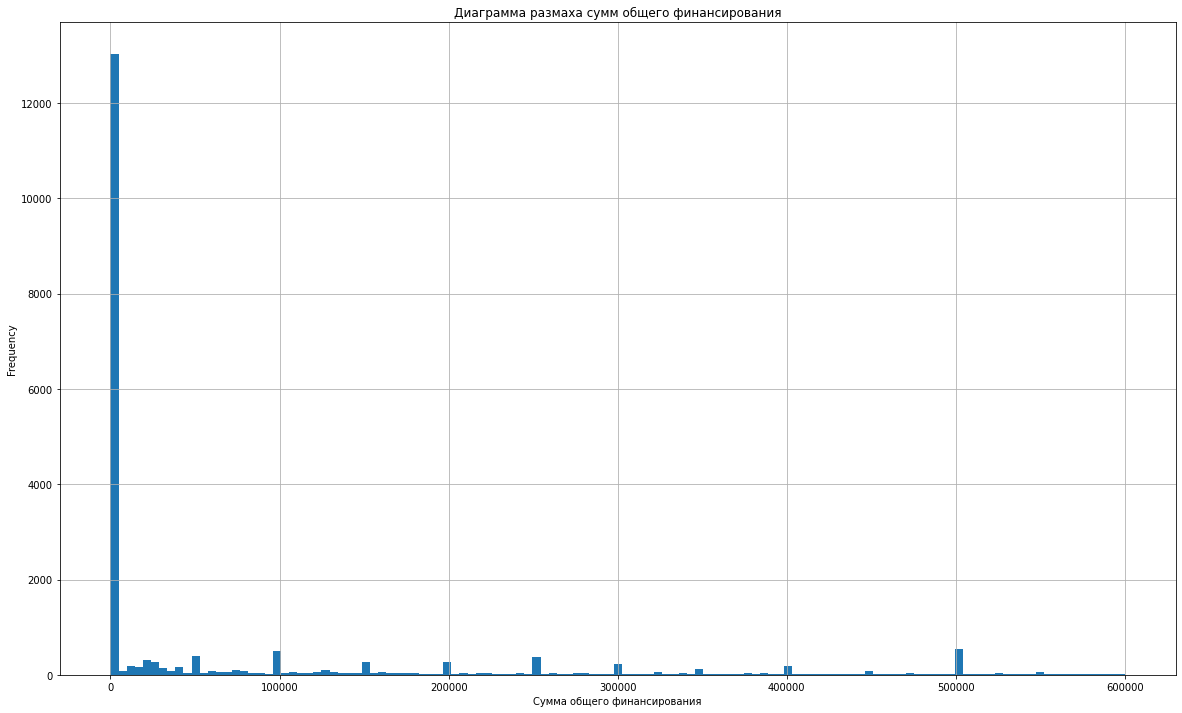

In [106]:
df[df['funding_total'] < 600000]['funding_total'].plot(kind='hist', bins = 125, grid=True,figsize=(20, 12) )
plt.title('Диаграмма размаха сумм общего финансирования')
plt.xlabel('Сумма общего финансирования')
plt.ticklabel_format(axis='x',style='plain')
plt.show()

In [107]:
df.groupby('funding_total')['funding_total'].count().sort_values(ascending=False)

funding_total
0.000000e+00    12972
1.000000e+06      700
5.000000e+05      524
1.000000e+05      480
2.000000e+06      456
                ...  
2.033700e+06        1
2.030880e+06        1
2.028720e+06        1
2.026500e+06        1
5.700000e+09        1
Name: funding_total, Length: 9483, dtype: int64

In [108]:
df['funding_total'].describe()

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64

In [109]:
df[df['funding_total'] == 0]['funding_total'].count()/df['funding_total'].count()

0.31724137931034485

Нижняя гранница это 0 ну или 100000, все что больше 10000 нас интересует с точки зрения анализа рразмера средст ввыделяегомо компаниями, тк компании которые инвестируют требуют другого анализа, это 32 процентиль если округлять, если расммотрреть распределение, с отсечкой 0-вых значений

In [110]:
df[df['funding_total'] != 0]['funding_total'].describe()

count    2.791800e+04
mean     1.484505e+07
std      6.775876e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.573200e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

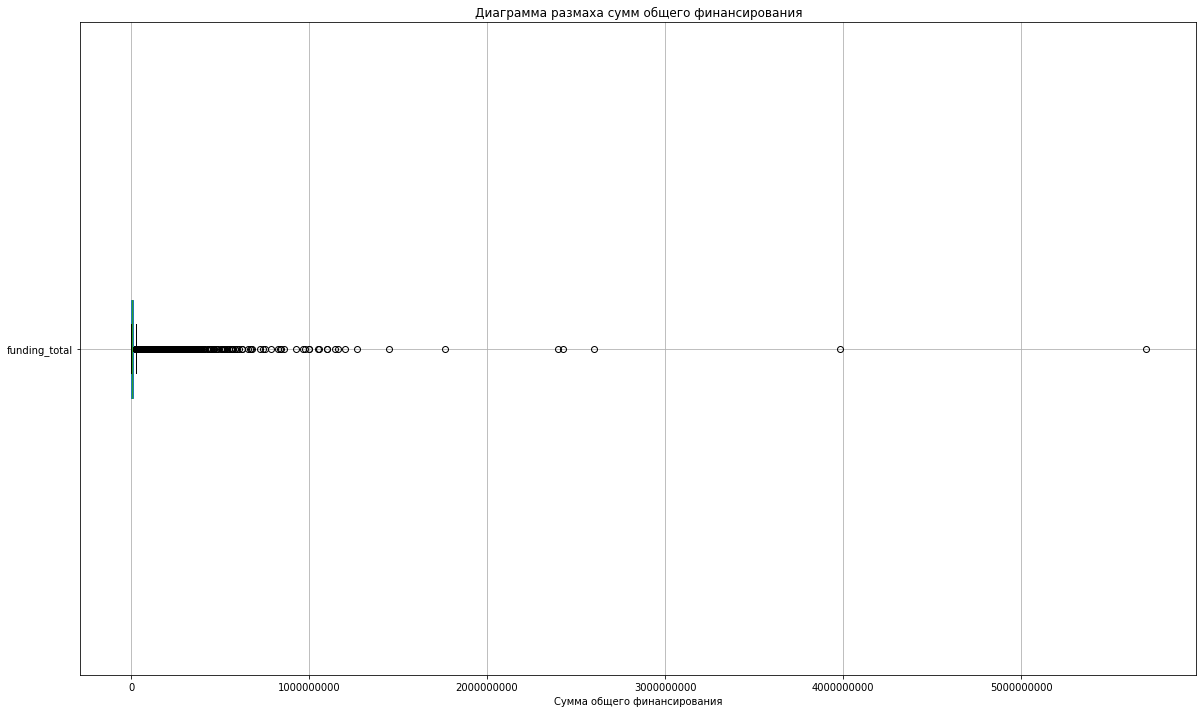

In [111]:
df[df['funding_total'] != 0]['funding_total'].plot(kind='box', grid=True,figsize=(20, 12),vert=False)
plt.title('Диаграмма размаха сумм общего финансирования')
plt.xlabel('Сумма общего финансирования')
plt.ticklabel_format(axis='x',style='plain')
plt.show()

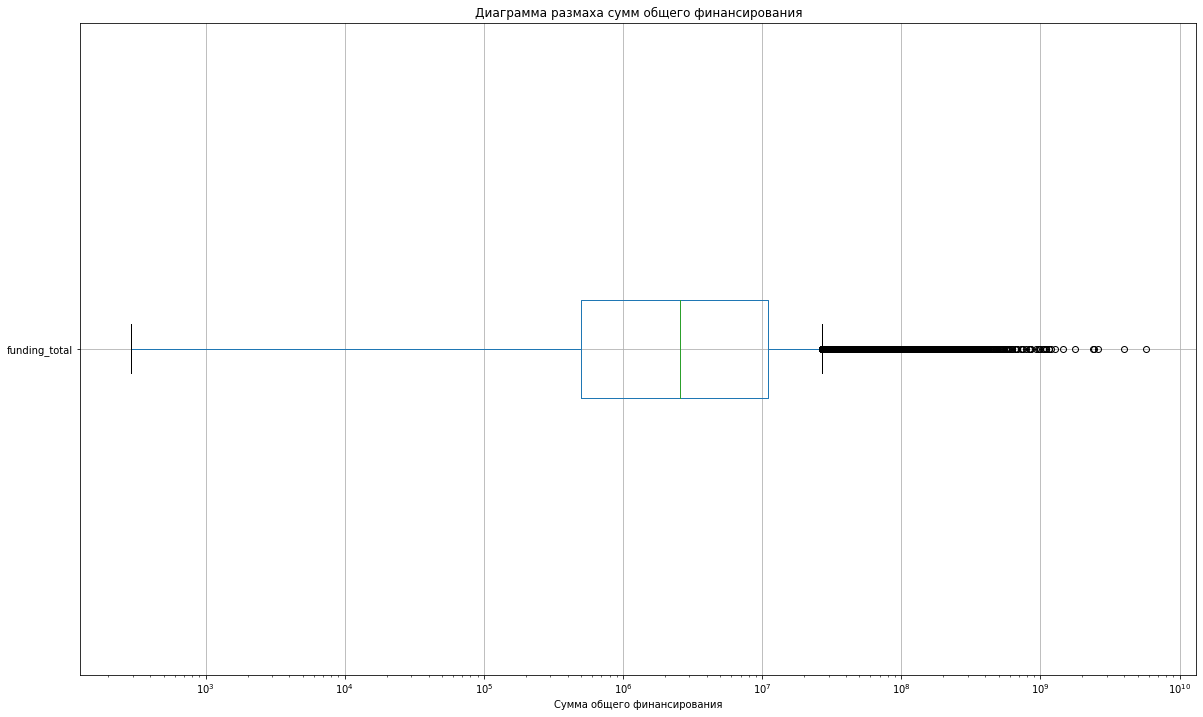

In [112]:

df[df['funding_total'] != 0]['funding_total'].plot(kind='box', grid=True,figsize=(20, 12),vert=False, logx=True)
plt.title('Диаграмма размаха сумм общего финансирования')
plt.xlabel('Сумма общего финансирования')

plt.show()

Мне кажется по формуле  Q3 + 1.5 * IQR неправильно отсеивать, я хочу суть коэффициент увеличить хотябы до 2, вообще сдесь вычитание лишнеее тк значения отличаются порядками, но ладно

In [113]:
df['funding_total'].quantile(0.75) + 2*(df['funding_total'].quantile(0.75)-df['funding_total'].quantile(0.25))

16893960.0

17 млн

In [114]:
1 - df[df['funding_total'] >= 17000000]['funding_total'].count()/df['funding_total'].count()

0.874468085106383

In [115]:
df[(df['funding_total'] != 0) & (df['funding_total'] <= 17000000)]['funding_total'].describe()

count    2.284500e+04
mean     3.409549e+06
std      4.173480e+06
min      2.910000e+02
25%      3.625000e+05
50%      1.500000e+06
75%      5.000000e+06
max      1.700000e+07
Name: funding_total, dtype: float64

Так получилось еще более приятно нгижняя граница все что больше 0, верхнаяя все что больше 17млн, это 31% и 87%


### 3.4. Цены стартапов по категориям


заполним пропуски в поле category на undef

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  acquiring_compan

In [122]:
df['category_code'] = df['category_code'].fillna('undef')

Заполниили пропускки, сразу воспользуемся советом и отсечем все нулевые знавчения и значения выше 90 проццентиля

In [123]:
df['price_amount'].quantile(0.9)

119000000.0

In [124]:
df_new = df[(df['price_amount'] < df['price_amount'].quantile(0.9)) & (df['price_amount'] > 0)].copy(deep=True)


In [125]:
pivot_std = df_new.pivot_table(values='price_amount', index='category_code', aggfunc='std')
pivot_std['std_rank'] = pivot_std.rank(ascending=False)
display(pivot_std)

,price_amount,std_rank
category_code,,
advertising,2.763636e+07,20.0
biotech,3.164594e+07,13.0
cleantech,3.445464e+07,7.0
consulting,2.454467e+07,25.0
ecommerce,3.662670e+07,5.0
education,1.746954e+07,27.0
enterprise,2.963841e+07,16.0
finance,3.756387e+07,4.0
games_video,3.060279e+07,15.0


In [126]:
pivot_mean = df_new.pivot_table(values='price_amount', index='category_code', aggfunc='mean')
pivot_mean['mean_rank'] = pivot_mean.rank(ascending=False)
display(pivot_mean)

,price_amount,mean_rank
category_code,,
advertising,3.464611e+07,16.0
analytics,8.000000e+07,2.0
automotive,4.300000e+07,8.0
biotech,3.610073e+07,12.0
cleantech,4.670214e+07,5.0
consulting,2.702130e+07,27.0
ecommerce,3.111708e+07,22.0
education,1.577800e+07,34.0
enterprise,3.091745e+07,24.0


In [127]:
pivot = pivot_mean.join(pivot_std, how='left', lsuffix= '_m', rsuffix= '_s' )
display(pivot)

,price_amount_m,mean_rank,price_amount_s,std_rank
category_code,,,,
advertising,3.464611e+07,16.0,2.763636e+07,20.0
analytics,8.000000e+07,2.0,NaN,NaN
automotive,4.300000e+07,8.0,NaN,NaN
biotech,3.610073e+07,12.0,3.164594e+07,13.0
cleantech,4.670214e+07,5.0,3.445464e+07,7.0
consulting,2.702130e+07,27.0,2.454467e+07,25.0
ecommerce,3.111708e+07,22.0,3.662670e+07,5.0
education,1.577800e+07,34.0,1.746954e+07,27.0
enterprise,3.091745e+07,24.0,2.963841e+07,16.0


In [128]:
pivot_count = df_new.pivot_table(values='price_amount', index='category_code', aggfunc='count')
display(pivot_count)

,price_amount
category_code,
advertising,54
analytics,1
automotive,1
biotech,112
cleantech,14
consulting,23
ecommerce,24
education,5
enterprise,69


In [129]:
pivot = pivot.join(pivot_count, how='left', lsuffix= '', rsuffix= '_c' )
display(pivot)
pivot.info()

,price_amount_m,mean_rank,price_amount_s,std_rank,price_amount
category_code,,,,,
advertising,3.464611e+07,16.0,2.763636e+07,20.0,54
analytics,8.000000e+07,2.0,NaN,NaN,1
automotive,4.300000e+07,8.0,NaN,NaN,1
biotech,3.610073e+07,12.0,3.164594e+07,13.0,112
cleantech,4.670214e+07,5.0,3.445464e+07,7.0,14
consulting,2.702130e+07,27.0,2.454467e+07,25.0,23
ecommerce,3.111708e+07,22.0,3.662670e+07,5.0,24
education,1.577800e+07,34.0,1.746954e+07,27.0,5
enterprise,3.091745e+07,24.0,2.963841e+07,16.0,69


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, advertising to web
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price_amount_m  36 non-null     float64
 1   mean_rank       36 non-null     float64
 2   price_amount_s  31 non-null     float64
 3   std_rank        31 non-null     float64
 4   price_amount    36 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.7+ KB


In [130]:
pivot['total_rank'] = pivot['mean_rank'] + pivot['std_rank'] 
display(pivot[pivot['price_amount'] >10]['total_rank'].sort_values().head(10))
display(pivot[pivot['price_amount'] >10]['mean_rank'].sort_values().head(10))
display(pivot[pivot['price_amount'] >10]['std_rank'].sort_values().head(10))

category_code
cleantech           12.0
search              12.0
security            20.0
mobile              23.0
network_hosting     23.0
biotech             25.0
semiconductor       25.0
ecommerce           27.0
web                 29.0
public_relations    31.0
Name: total_rank, dtype: float64

category_code
cleantech           5.0
security            9.0
search             10.0
semiconductor      11.0
biotech            12.0
mobile             13.0
network_hosting    14.0
advertising        16.0
games_video        17.0
software           19.0
Name: mean_rank, dtype: float64

category_code
search               2.0
ecommerce            5.0
public_relations     6.0
cleantech            7.0
web                  8.0
network_hosting      9.0
mobile              10.0
security            11.0
biotech             13.0
semiconductor       14.0
Name: std_rank, dtype: float64

отсеил категории с кол-вом меньше 10 для более точной статистики

Три рейтинга общий, для типичного значения цены, и для меры размаха цен, выбрал цифру 10 как стандартную для рейтинга топов Обратил бы внимание на первые две категории в общем рейтинге cleantech, search они выделяются среди отсальных как разбросом так и типичной цееной что может быть выгодно при этом данные бьолее полные(кол-во больше 10)

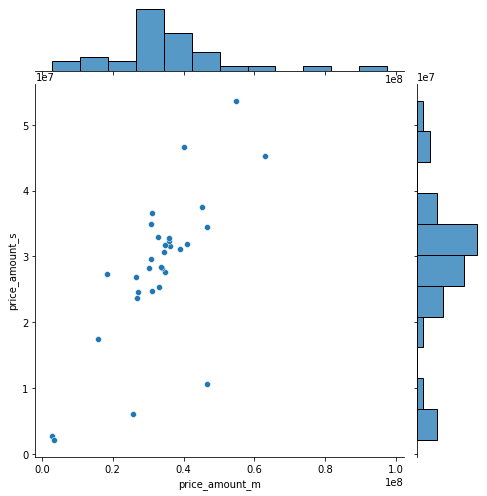

In [131]:
sns.jointplot(data=pivot, x='price_amount_m', y='price_amount_s', kind='scatter',legend=False, height=7)



### 3.5. Типичное значение количества раундов для каждого возможного статуса стартапа


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         40890 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  acquiring_compan

In [133]:
df['funding_rounds'].describe()

count    40890.000000
mean         1.289313
std          1.264921
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

минимальное значение 0, есть стартапы с 15 раундами финансирвоания это максимально знчение, в среднем это 1-2 раунда

In [134]:

pivot_status = df.pivot_table(values='funding_rounds', index='status', aggfunc='mean')

display(pivot_status)

,funding_rounds
status,
acquired,0.525532
closed,1.381453
ipo,1.934375
operating,1.522658


Ну в целом как я понимаю для каждой категории закономерный резйльтат acquired этот перспективные стартапы, которых приобрели на ранних этапах поэтому мало раундов, закрытые это те которое себя не оправдали в них пофинансировали но после ряда неудач перестали и проект закрылся, operating как я понимаю это стартапы которые сейчас активны но все еще развиваются еще больше этапов финансирования, и ipo это те стартапы которые вышли на рынок продаж акций, выпустили свои вот от чего больше раундов финансирования наиболее успешные, все закономерно названию

И график который просили

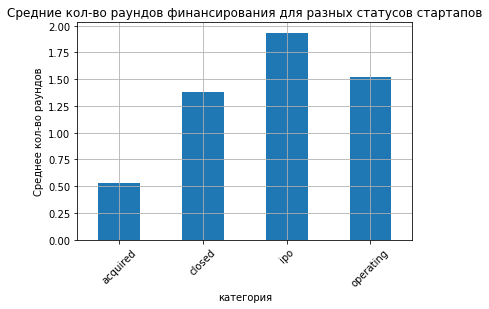

In [135]:
pivot_status.plot(kind='bar',grid=True,legend=False, rot='45')
plt.title('Средние кол-во раундов финансирования для разных статусов стартапов')
plt.xlabel('категория')
plt.ylabel('Среднее кол-во раундов')
plt.show()


## Шаг 4. Итоговый вывод и рекомендации


 В первой части проекта мы познакомились с данными, совершили предобработку, поработали с пропусками, проверили данные на здравый смысл привели все к общему стилю. Самая важная по содержанию таблица companies_and_rounds, оказалась самой проблемной и самой грязной, как мы догадались ее собрали из двух отсюда много пропусков, для нас важна только ее половина с информацией о компаниях
Мы отобрали компании по следующим критериям впервую очередь это компании которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании и проводили анлиз уже с этими компаниями
Посмотрели и оценили выбросы по общей сумме финансирования, оценили типичные значения и где лежат выбросы, вообще здесь хочется отметить что финансирование варьируется от сотен до млрд долларов, поэтому поиск среднего немного бесполоезное дело, на глаз мы оценили ворота и границы, но лучще быы разбить наверное на под категории для разного бюджета
Оказалось что есть компании котороые купили за 1 долар а есть те которое были бесплатно проданы, очень много странных покупок, в отсутсвии финансирования, но ввидимо есть стартапы которые сменили руководство на других условиях или произошло слияние компаний, которое происходит не за деньги от чего финансирование было а стоимость ноль.
Провели небольшой анализ и выделили составвили топ 10 и выдеелилди в нем 2 категории по двум критериям типично высокими ценами(как критерий медиана); и наибольшим разбросом цен(как критерий среднеквадратичное отклонение) за стартап, это те катеегории где можно рискнуть и заработать оченьб много:cleantech, search, при этом поработавв с выбросами и отфильтровав сатегории с кол-вом сеньше 10, для более полной статистики.
Также исслеедовали типичное значение раунднов для разных статусов стартапа ну в целом как я понимаю для каждой категории закономерный результат, ввсе зависит от степени развития проекта и его успешности, купили его сразу или он не выгорел
В целом данные не смотря на хаотичность и грязность, содержат полезную достоверную информацию по которой можно попытатся выработать стратегию при покупке потенциально удченыых активов, что актульно, что чаще финансируют, где можно заработать максимум и рискнуть